# Happiness Index and a Population's Internet Usage <br>
#### Data cleanup and analysis code by: <br>
> Ricardo G. Mora, Jr. <br>
#### Happiness Index Provided by: <br>
> World Happiness Report <br>
> John F Helliwell, Richard Layard, Jeffrey D. Sachs, Jan_Emmanuel De Neve, Lara B. Aknin, and Shun Wang <br>
> https://worldhappiness.report/ <br>

#### Internet Usage Data Provided by: <br>
> The World Bank / International Telecommunication Union (ITU) World Telecommunication/ICT Indicators Database <br>
> https://data.worldbank.org/indicator/IT.NET.USER.ZS
    

In [43]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.stats import linregress

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data files
internetdatafile = "Input_Data/internet_usage_data.xlsx"
happinessdatafile = "Input_Data/WHR2015-21.xlsx"
internetoutputfile = "Output_Data/cleaned_internet_usage_data.csv"
happinessoutputfile = "Output_Data/happiness_data_inclulding_intenet.csv"
plot1 = "Output_Data/internet_vs_happiness_plot.png"

In [57]:
# Read in happiness data and display
happinessdata = pd.read_excel(happinessdatafile)
happinessdata.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144


In [45]:
# Read in internet usage data and display
internetdata = pd.read_excel(internetdatafile)
internetdata.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.000000,74.000000,78.900000,83.780000,88.661227,93.542454,97.170000,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.904114,8.940634,10.552158,13.052010,15.990277,17.165587,20.332119,23.657366,26.448284,NaN
2,Afghanistan,AFG,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.454545,5.900000,7.000000,8.260000,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.663310,10.335555,12.901207,15.470625,19.421850,21.369414,24.676247,29.741679,32.418191,NaN
4,Angola,AGO,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.100000,6.500000,8.900000,21.400000,29.000000,29.000000,32.000000,35.000000,36.000000,NaN


In [50]:
# Create new empty dataframe for internet usage data
modifieddata = pd.DataFrame(columns = ["Country", "Year", "Internet Use"])

# Append a new row to the new dataframe for every row/year combination in originaal dataframe
for index, row in internetdata.iterrows():
    for year in range(2015, 2021):
        if str(year) in internetdata.columns:
            newrow = [row["Country Name"], year, row[str(year)]]
            modifieddata.loc[len(modifieddata)] = newrow

# Drop Nan rows
modifieddata.dropna(inplace=True)
            
# Save new dataframe to csv file
modifieddata.to_csv(internetoutputfile, index=False)

# Display
modifieddata.head()

,Country,Year,Internet Use
0,Aruba,2015,88.661227
1,Aruba,2016,93.542454
2,Aruba,2017,97.170000
6,Africa Eastern and Southern,2015,15.990277
7,Africa Eastern and Southern,2016,17.165587


In [51]:
# Merge the internet usage dataframe with the happiness dataframe and drop NaN rows
mergeddata = pd.merge(happinessdata, modifieddata, on=["Country", "Year"], how="left")
mergeddata.dropna(inplace=True)

# Save merged data to csv file
mergeddata.to_csv(happinessoutputfile, index=False)

# Display 
mergeddata.head()

,Country,Score,Rank,Year,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Internet Use
0,Switzerland,7.587,1,2015,10.857283,0.953136,72.736862,0.947724,0.080692,0.301402,87.479056
1,Iceland,7.561,2,2015,10.568534,0.975240,72.968559,0.912811,0.257895,0.741834,98.200000
2,Denmark,7.527,3,2015,10.639521,0.957780,70.323395,0.932365,0.137351,0.200448,96.330502
3,Norway,7.522,4,2015,11.048872,0.945359,70.705254,0.951669,0.144468,0.388029,96.810326
4,Canada,7.427,5,2015,10.642016,0.941860,71.443192,0.916792,0.285598,0.444144,90.000000


In [63]:
print(f"Number of countries in Internet Use data before cleaning: {internetdata['Country Name'].nunique()}")
print(f"Number of countries in Internet Use data after cleaning: {modifieddata['Country'].nunique()}")
print(f"Number of countries in Happiness data before merging: {happinessdata['Country'].nunique()}")
print(f"Number of countries in Happiness data after merging: {mergeddata['Country'].nunique()}")

Number of countries in Internet Use data before cleaning: 266
Number of countries in Internet Use data after cleaning: 253
Number of countries in Happiness data before merging: 172
Number of countries in Happiness data after merging: 143


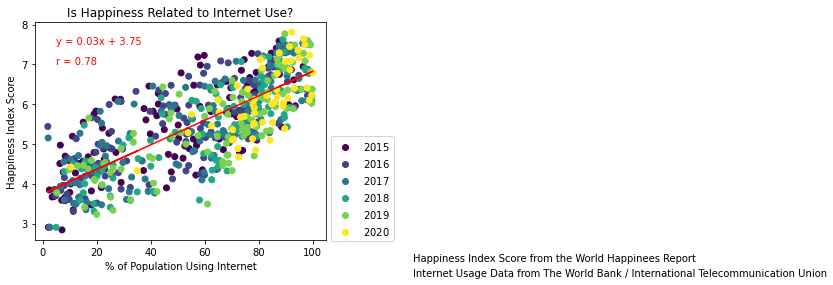

In [48]:
# Find line of regresson
(m, b, r, p, stderr) = linregress(mergeddata["Internet Use"], mergeddata["Score"])
y_regress = m * mergeddata["Internet Use"] + b

# Make scatter diagram
scatter = plt.scatter(mergeddata["Internet Use"], mergeddata["Score"], c=mergeddata["Year"])
plt.xlabel("% of Population Using Internet")
plt.ylabel("Happiness Index Score")
plt.title("Is Happiness Related to Internet Use?")
plt.legend(*scatter.legend_elements(), bbox_to_anchor=(1,.5))

# Plot line of regression
plt.plot(mergeddata["Internet Use"], y_regress, color="red")
plt.annotate(f"y = {m:.2f}x + {b:.2f}", color="red", xy=(5, 7.5))
plt.annotate(f"r = {r:.2f}", color="red", xy=(5, 7.0))

plt.figtext(1, .05, "Happiness Index data from the World Happiness Report")
plt.figtext(1, 0, "Internet Usage data from The World Bank / International Telecommunication Union")

# Display plot and save to file
plt.subplots_adjust(right=.8)
plt.savefig(plot1)
plt.show()

Observation:  There seems to be a strong correlation between the Happiness Index and the percent of the population using the Internet.<br>  